In [13]:
# Import libraries
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow_datasets as tfds

In [14]:
# Get data images from 
(ds_train, ds_test), ds_info = tfds.load("mnist", split=["train","test"],shuffle_files=True, as_supervised=True, with_info=True)

# Convert to NumPy arrays
x_train = []
y_train = []

for image, label in tfds.as_numpy(ds_train):
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = []
y_test = []

for image, label in tfds.as_numpy(ds_test):
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)


2025-05-07 15:29:54.391122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-07 15:29:54.966098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Axes: ylabel='count'>

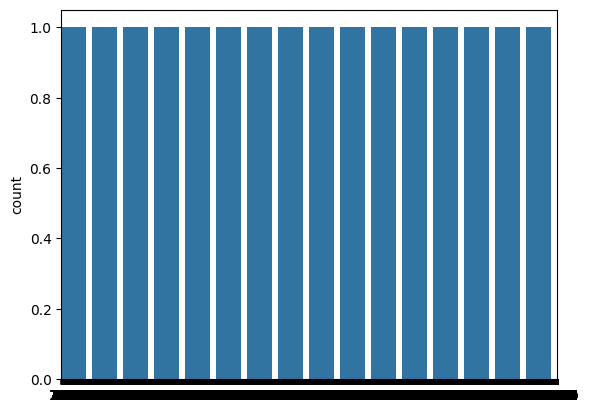

In [5]:
# Plot y train count
sns.countplot(y_train)

In [6]:
# Check for NaN values in training set
np.isnan(x_train).any()

False

In [7]:
# Check for NaN values in test set
np.isnan(x_test).any()

False

In [15]:
# Store all pictures in single tensor:
input_shape = (28,28,1)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],1)
x_train = x_train/255.0
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2],1)
x_test = x_test/255.0

In [16]:
# Label encoding: Converting labels to binary values using one_hot function
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test  = tf.one_hot(y_test.astype(np.int32), depth=10)

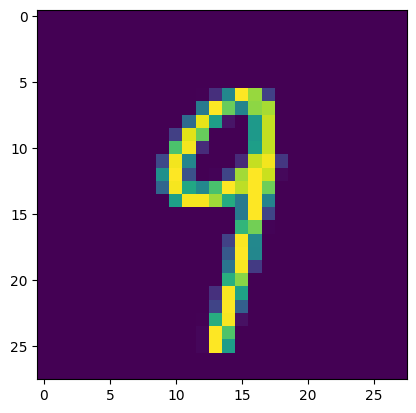

In [17]:
plt.imshow(x_train[400][:,:,0])

In [18]:
# Define model: Start with defining batch size, num_classes and epochs. 
# Num_classes because we are going from 0 to 9 in terms of digit identification
batch_size = 64
num_classes = 10
epochs = 40

In [19]:
# Define model: 
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='linear')
    ]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [20]:
# Fit model
history=model.fit(x_train,y_train, epochs=10)

Epoch 1/10


2025-05-07 15:30:22.042662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - categorical_accuracy: 0.8593 - loss: 0.4904
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.9143 - loss: 0.3058
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9156 - loss: 0.3090
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9130 - loss: 0.3176
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9138 - loss: 0.3256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9075 - loss: 0.3432
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9072 - loss: 0.3561
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9066 - loss: 0.3720
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9041 - loss: 0.3867
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9017 - loss: 0.4025


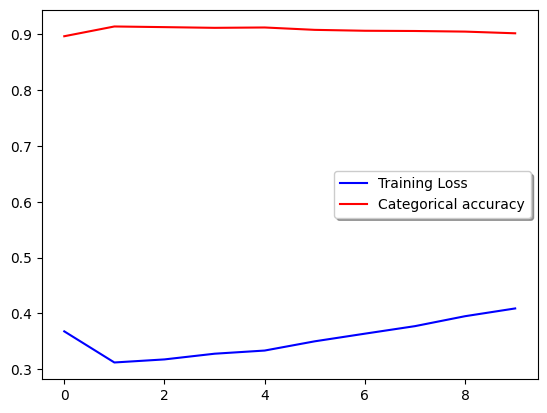

In [22]:
# Loss and accuracy curves
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
#ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
ax.plot(history.history['categorical_accuracy'], color='r', label="Categorical accuracy")
legend = ax.legend(loc='best', shadow=True)


In [23]:
# Predict results
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.9127 - loss: 0.4047


In [24]:
# Confusion matrix:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step


<Axes: >

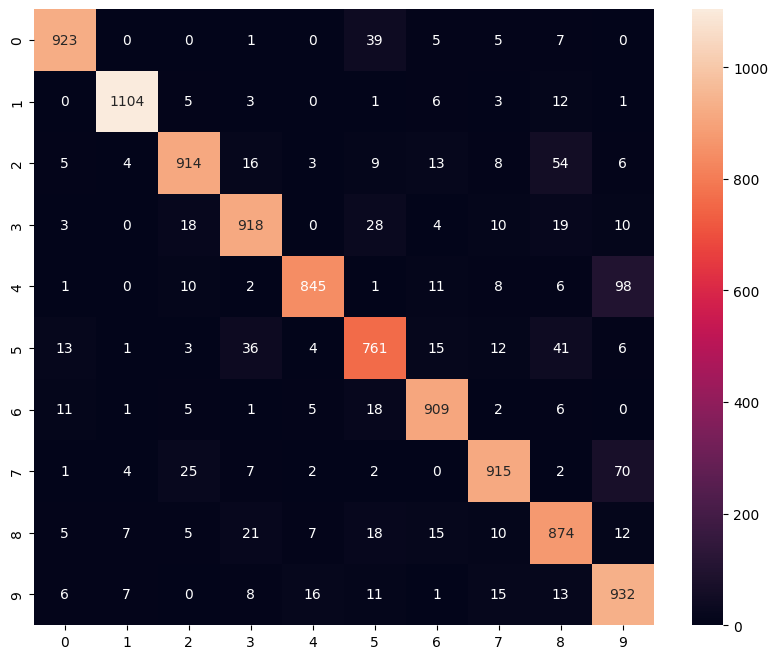

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')